In [ ]:
!pip install scikit-learn



In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import io
data=pd.read_csv(io.BytesIO(uploaded['Bengaluru_House_Data.csv']))

#EDA

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
data.shape

(13320, 9)

In [ ]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
data["area_type"].nunique() #4
data["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
data["availability"].nunique()

81

In [ ]:
data["location"].nunique()

1305

In [ ]:
data["size"].nunique()

31

In [ ]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [ ]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:

range_pattern = r'^\d+-\d+$'

# Check if any value in the column matches the range pattern
contains_range = data['total_sqft'].str.match(range_pattern).any()

if contains_range:
    print("The column contains at least one range value.")
else:
    print("The column does not contain any range values.")


The column does not contain any range values.


In [ ]:
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce', downcast='float')
#convert str to float
data['total_sqft'].head()


0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float32

In [ ]:
#data.drop(columns=['availability','society'],inplace=True)
#from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
#le = LabelEncoder()
#data['society'] = le.fit_transform(data['society'])

In [ ]:
#data.head()

In [ ]:
#inputval = data['area_type'].values.reshape(-1,1)

In [ ]:
#oe = OrdinalEncoder(categories=[['Super built-up  Area','Built-up  Area','Plot  Area','Carpet  Area']])
#data['labelled_areatype'] = oe.fit_transform(inputval)
#data.head()

In [ ]:
#data['total_sqft'].head()

In [ ]:
data['bedrooms'] = data['size'].str.extract('(\d+)').astype(float)

In [ ]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft       247
bath              73
balcony          609
price              0
bedrooms          16
dtype: int64

In [ ]:
data['bedrooms'].head()

0    2.0
1    4.0
2    3.0
3    3.0
4    2.0
Name: bedrooms, dtype: float64

In [ ]:
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].mean().round().astype(float))
data['balcony'] = data['balcony'].fillna(data['balcony'].mean().round().astype(float))
data['total_sqft'] = data['total_sqft'].fillna(data['total_sqft'].mean())
data['bath'] = data['bath'].fillna(data['bath'].mean().round().astype(float))
data['location']=data['location'].fillna('Whitefield')

In [ ]:
data['balcony'].value_counts()

2.0    5722
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

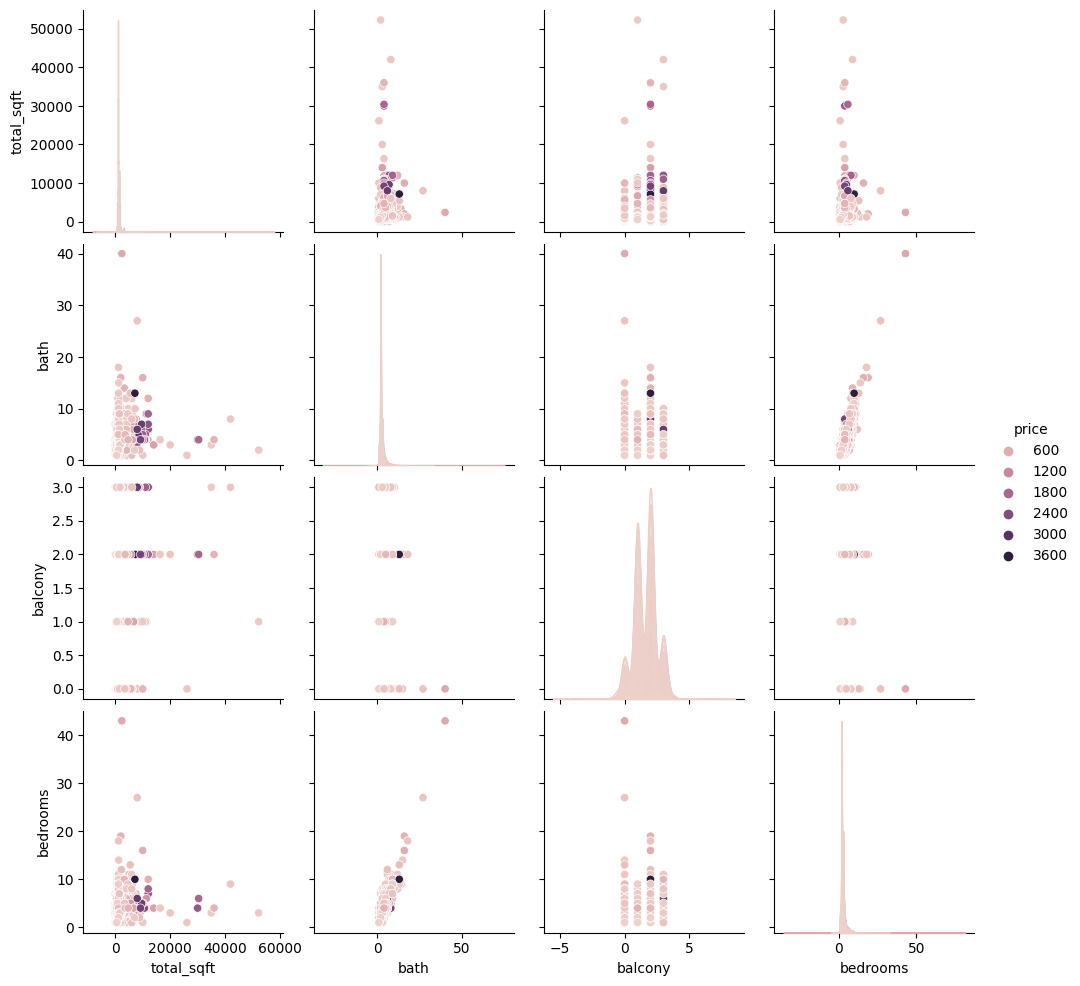

In [ ]:
sns.pairplot(data,hue='price')

<Axes: xlabel='total_sqft', ylabel='price'>

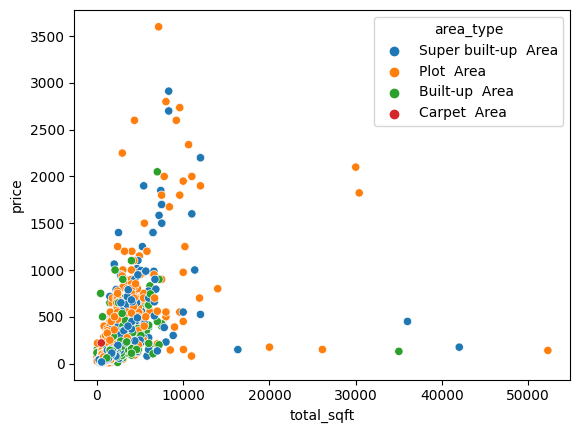

In [ ]:
sns.scatterplot(x=data['total_sqft'],y=data['price'],hue=data['area_type'])

we notice ..few data points where total_sqft is more but the price is insignificanctly less which doesnt make any sense .we treat them as outliers

<Axes: xlabel='bedrooms', ylabel='price'>

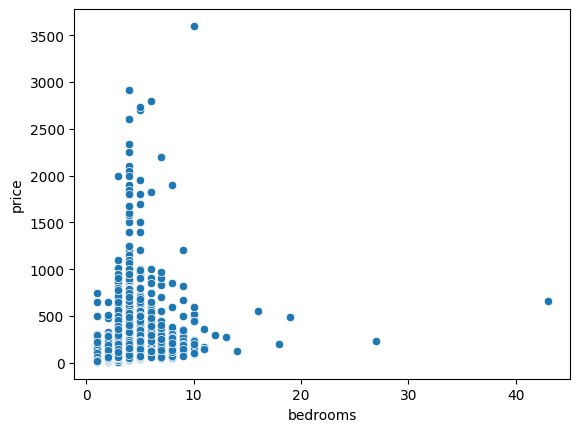

In [ ]:
sns.scatterplot(x=data['bedrooms'],y=data['price'])

<Axes: xlabel='area_type', ylabel='price'>

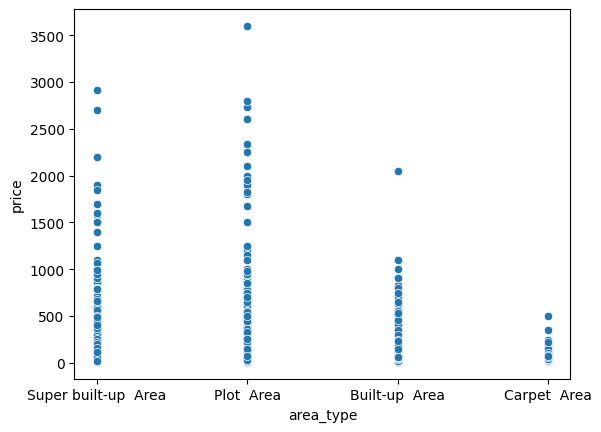

In [ ]:
sns.scatterplot(x=data['area_type'],y=data['price'])

In [ ]:
data.isna().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
bedrooms           0
dtype: int64

In [ ]:


# Filter rows where 'total_swft' is greater than 15000 and less than 300
filtered_indices = data[(data['total_sqft'] > 15000) | (data['total_sqft'] < 300)].index

# Drop the filtered rows from the DataFrame
data.drop(filtered_indices, inplace=True)

# Reset the index if needed
#housing_data.reset_index(drop=True, inplace=True)


In [ ]:
print(filtered_indices)

Int64Index([  119,   349,   674,  1020,  1122,  1894,  2486,  2623,  4086,
             4972,  5393,  5469,  5970,  7242,  7947, 10526, 11558, 12470,
            12987, 13216],
           dtype='int64')


<Axes: xlabel='total_sqft', ylabel='price'>

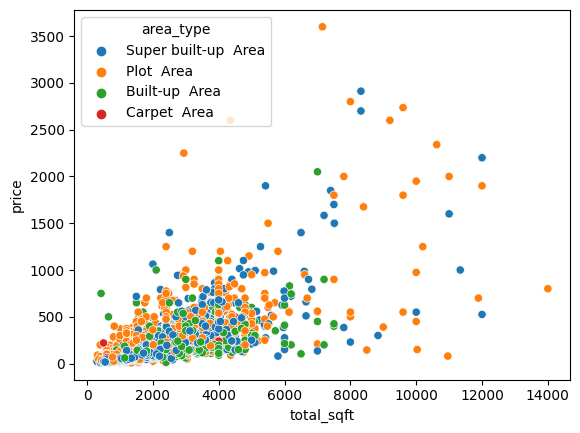

In [ ]:
sns.scatterplot(x=data['total_sqft'],y=data['price'],hue=data['area_type'])

<Axes: xlabel='bedrooms', ylabel='price'>

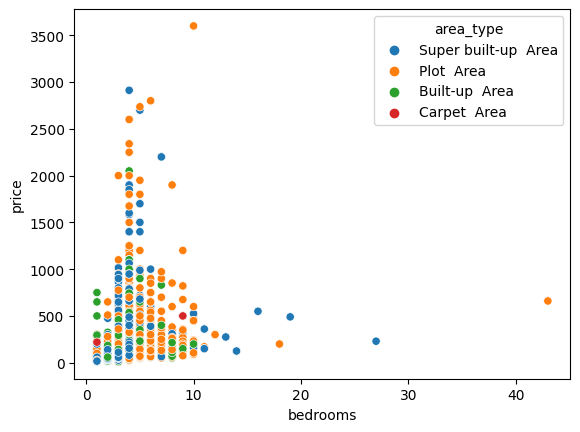

In [ ]:
sns.scatterplot(x=data['bedrooms'],y=data['price'],hue=data['area_type'])

<Axes: xlabel='bath', ylabel='price'>

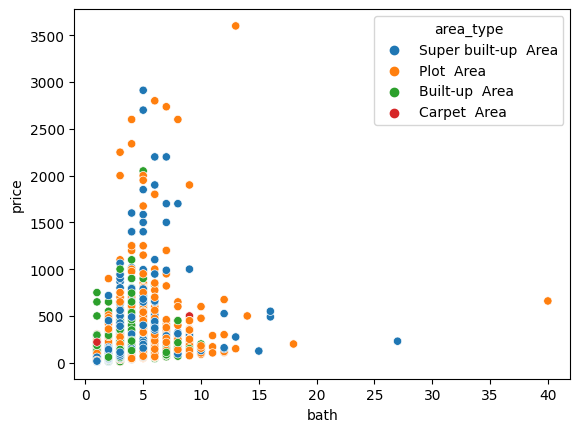

In [ ]:
sns.scatterplot(x=data['bath'],y=data['price'],hue=data['area_type'])

<Axes: xlabel='balcony', ylabel='price'>

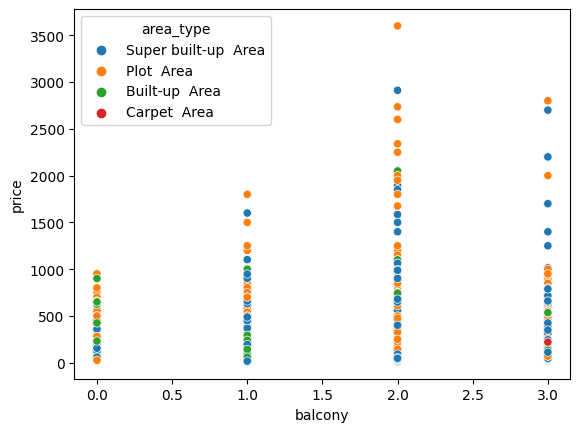

In [ ]:
sns.scatterplot(x=data['balcony'],y=data['price'],hue=data['area_type'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13300 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13300 non-null  object 
 1   availability  13300 non-null  object 
 2   location      13300 non-null  object 
 3   size          13284 non-null  object 
 4   society       7812 non-null   object 
 5   total_sqft    13300 non-null  float32
 6   bath          13300 non-null  float64
 7   balcony       13300 non-null  float64
 8   price         13300 non-null  float64
 9   bedrooms      13300 non-null  float64
dtypes: float32(1), float64(4), object(5)
memory usage: 1.1+ MB


In [ ]:
columns_to_check = ['bath', 'bedrooms','size']
data.dropna(subset=columns_to_check, inplace=True)

In [ ]:
data.isna().sum()

area_type          0
availability       0
location           0
size               0
society         5485
total_sqft         0
bath               0
balcony            0
price              0
bedrooms           0
dtype: int64

In [ ]:
filtered_indices1 = data[(data['bath'] > 15)].index

# Drop the filtered rows from the DataFrame
data.drop(filtered_indices1, inplace=True)

In [ ]:
data['bedrooms'].value_counts()

2.0     5527
3.0     4853
4.0     1412
1.0      650
5.0      355
6.0      220
7.0       99
8.0       89
9.0       53
10.0      14
11.0       4
14.0       1
12.0       1
13.0       1
Name: bedrooms, dtype: int64

<Axes: xlabel='total_sqft', ylabel='price'>

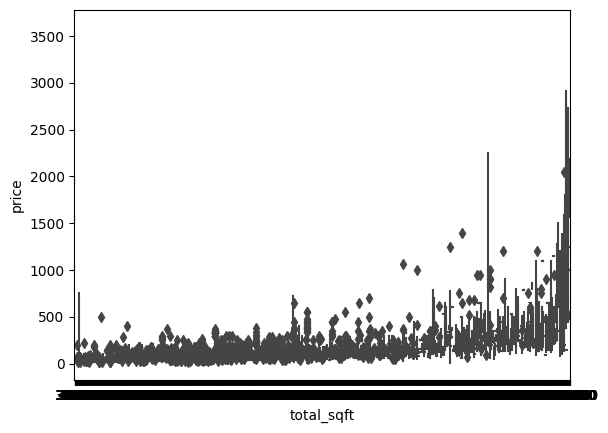

In [ ]:
sns.boxplot(x=data['total_sqft'],y=data['price'])

In [ ]:
data['location'] = data['location'].apply(lambda x:x.strip())
location_count = data['location'].value_counts()
location_count_less_10 = location_count[location_count<=10]
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [ ]:
data['location'].value_counts()

other                 2868
Whitefield             540
Sarjapur  Road         396
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [ ]:
(data['total_sqft']/data['bedrooms']).describe()

count    13279.000000
mean       570.260100
std        240.590854
min         66.666667
25%        471.666667
50%        550.500000
75%        625.000000
max      10030.000000
dtype: float64

In [ ]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']
def remove_outliers_sqft(data):
    df_output = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output, gen_df], ignore_index=True)
    return df_output
data= remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
count,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000
mean,1490.623535,2.547544,1.612708,93.171365,2.659396,5884.074823
std,784.784302,1.087429,0.782839,87.173825,1.030710,2578.194749
min,300.000000,1.000000,0.000000,10.000000,1.000000,1600.000000
25%,1100.000000,2.000000,1.000000,49.500000,2.000000,4252.446122
50%,1280.000000,2.000000,2.000000,68.000000,3.000000,5250.310559
75%,1640.000000,3.000000,2.000000,103.000000,3.000000,6666.666667
max,14000.000000,15.000000,3.000000,2200.000000,14.000000,26973.684211


In [ ]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats= {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices =np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [ ]:
data=bhk_outlier_remover(data)

In [ ]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,NaN,2850.0,4.0,1.0,428.0,4.0,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,3 BHK,NaN,1630.0,3.0,2.0,194.0,3.0,11901.840491
2,Super built-up Area,17-Dec,1st Block Jayanagar,6 BHK,NaN,1200.0,6.0,2.0,125.0,6.0,10416.666667
3,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,NaN,1875.0,2.0,3.0,235.0,3.0,12533.333333
4,Plot Area,Ready To Move,1st Block Jayanagar,7 Bedroom,NaN,930.0,4.0,2.0,85.0,7.0,9139.784946
...,...,...,...,...,...,...,...,...,...,...,...
11086,Super built-up Area,Ready To Move,other,1 BHK,NaN,1800.0,1.0,1.0,200.0,1.0,11111.111111
11089,Plot Area,Ready To Move,other,6 Bedroom,NaN,1200.0,5.0,2.0,130.0,6.0,10833.333333
11090,Super built-up Area,Ready To Move,other,2 BHK,OlarkLa,1353.0,2.0,2.0,110.0,2.0,8130.081301
11091,Plot Area,18-Jan,other,1 Bedroom,NaN,812.0,1.0,0.0,26.0,1.0,3201.970443


In [ ]:
data.drop(columns=['size', 'price_per_sqft'], inplace=True)


In [ ]:
data.shape

(7923, 9)

In [ ]:
data.to_csv("Cleaned_data.csv")

In [ ]:
X=data.drop(columns=['area_type','availability','society','price'])
y=data['price']

In [ ]:
X

,location,total_sqft,bath,balcony,bedrooms
0,1st Block Jayanagar,2850.0,4.0,1.0,4.0
1,1st Block Jayanagar,1630.0,3.0,2.0,3.0
2,1st Block Jayanagar,1200.0,6.0,2.0,6.0
3,1st Block Jayanagar,1875.0,2.0,3.0,3.0
4,1st Block Jayanagar,930.0,4.0,2.0,7.0
...,...,...,...,...,...
11086,other,1800.0,1.0,1.0,1.0
11089,other,1200.0,5.0,2.0,6.0
11090,other,1353.0,2.0,2.0,2.0
11091,other,812.0,1.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
column_trans =make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder='passthrough')

In [ ]:
scaler=StandardScaler()

In [ ]:
lr = LinearRegression()

In [ ]:
pipe =make_pipeline(column_trans, scaler, lr)

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_lr=pipe.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_lr)

0.8101274631013866

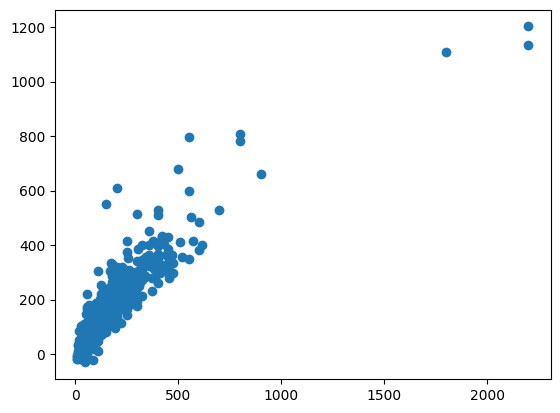

In [ ]:
plt.scatter(y_test,y_pred_lr)

In [ ]:
lasso= Lasso()
pipe = make_pipeline(column_trans, scaler, lasso)
pipe.fit(X_train, y_train)
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8007941977105011

In [ ]:
ridge = Ridge()
pipe = make_pipeline(column_trans, scaler, ridge)
pipe.fit(X_train, y_train)
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8100146234155927

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)

pipe = make_pipeline(column_trans, scaler,knn)
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7aec423e1cf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.p

R2 score 0.6339941027183206


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error
dt= DecisionTreeRegressor(max_depth=8)

pipe = make_pipeline(column_trans, scaler,dt)
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))



R2 score 0.7118321897593175


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR


In [ ]:

rf= RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = make_pipeline(column_trans, scaler,rf)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7188003191678289


In [ ]:

ada= AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = make_pipeline(column_trans, scaler,ada)
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.6358096728832896


In [ ]:

gb = GradientBoostingRegressor(n_estimators=500)

pipe = make_pipeline(column_trans, scaler,gb)
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7826075135584056


In [ ]:
ridge = Ridge()
pipe = make_pipeline(column_trans, scaler, ridge)
pipe.fit(X_train, y_train)
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8100146234155927

In [ ]:
import pickle
pickle.dump(pipe,open('Ridge.pkl','wb'))

In [ ]:
import os
os.listdir('/content/')


['.config',
 'Cleaned_data.csv',
 'Bengaluru_House_Data.csv',
 'Ridge.pkl',
 'sample_data']

In [ ]:
from google.colab import files

# Replace '/content/Ridge.pkl' with the actual path to your pickle file
files.download('/content/Ridge.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section